# Part 2. Scale-free Networks

First a couple of questions to make sure that you've actually read the text.

- What are the three slope dependent regimes of complex networks with power-law degree distributions? Briefly describe each one. (You will have to skim chp 5.7 to answer this one).
    - 
    - 
    - 
- What are the three regimes we find in non-linear preferential attachement? (chapter 5) Briefly describe each one.
    - Sublinear, linear, superlinear.

We're going to create our own Barabasi-Albert model (a special case) in right in a notebook. Follow the recipe below for success:

- First create a graph consisting of a single link. (You can call the nodes anything, but I would simply use integers as names).


In [1]:
import networkx as nx
import random
import numpy 

BA = nx.Graph()

BA.add_node(0)
BA.add_node(1)
BA.add_edges_from([(0,1), (1,2)])

numpy.array(BA.edges).flatten()

array([0, 1, 1, 2])

In [6]:
for i in range (3, 5000):
    f = numpy.array(BA.edges).flatten()
    BA.add_node(i)
    rdm_node = random.choice(f)
    BA.add_edge(i, rdm_node)

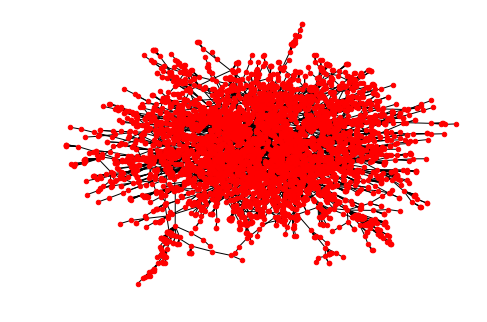

In [7]:
nx.draw(BA, node_size=20)

- What's the maximum and minimum degree?
- Now, bin the degree distribution using numpy.histogram.
Plot the distribution. Plot it with both linear and log-log axes.

In [18]:
degs = list()
for n, k in BA.degree:
    degs.append(k)
print('k min = ', min(degs))
print('k max = ', max(degs))

k min =  1
k max =  198


In [23]:
deg_dist = numpy.histogram(BA.degree, bins=sorted(set(degs)))

In [22]:
import matplotlib.pyplot as pyplot

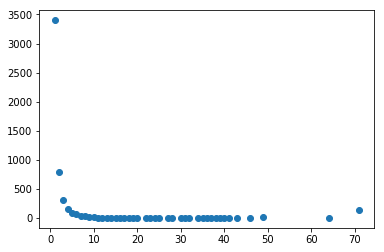

In [54]:
y = deg_dist[0]
x = deg_dist[1][0 : len(y)]
pyplot.plot(x, y, 'o')

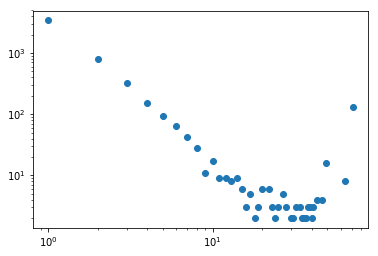

In [55]:
pyplot.loglog(x, y, 'o')

## Friendship paradox

_Almost everyone_ have a fewer friends than their friends have, on average.

In [86]:
i = random.choice(list(BA.nodes))
k_i = BA.degree(i)

In [98]:
def k_avg_neighbors(i):
    neigh_degs = list()
    for neighbor in BA.neighbors(i):
        neigh_degs.append(BA.degree(neighbor))
    return numpy.average(neigh_degs)

In [96]:
def friendship_paradox (k_i, k_avg_neigh):
    if k_i < k_avg_neigh:
        return True
    else:
        return False

In [102]:
t = 0
f = 0
for x in range (0, 1000):
    j = random.choice(list(BA.nodes))
    k_j = BA.degree(j)
    if friendship_paradox(k_j, k_avg_neighbors(j)):
        t = t +1
    else:
        f = f + 1
print('t: ', t, '. f: ', f)

t:  873 . f:  127


### Growth mechanism
Finally, we'll build a network of same size and degree, using the growth mechanism without the preferential attachment.

- Compare to the ER network of same size and same p. What are the differences? Explain in your own words. Hint: To get started, take a look at the degree distribution, and study the number of connected components.

In [108]:
def p_k_i(graph):
    f = numpy.array(graph.edges).flatten()
    i = random.choice(f)
    return graph.degree(i)/numpy.sum(graph.degree)

In [120]:
k = numpy.average(BA.degree)
m = 5000
p = 2 * numpy.power(m, 2) * numpy.power(k, -3)
print(p)

0.025552908776316847


In [117]:
ER = nx.erdos_renyi_graph(m, p)

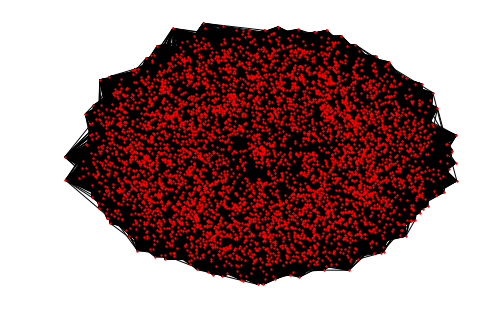

In [119]:
nx.draw(ER, node_size=2)